# Example from La Palma
- This notebook shows how to convert the Raman-based FI densities from Dayton et al. (2023) into pressures and depths in the crust
- This assumes +-50K in entrapment temperature, and an error in CO$_2$ density of 0.002925
- Depth is calculated using a 2-step density profile, with 2.8 g/cm3 above the Moho, and 3.1 g/cm3 below
- Get the data here!
- https://github.com/PennyWieser/DiadFit/blob/main/docs/Examples/Example5_FI_density_to_depth/Dayton_et_al_2023_LaPalma_Example.xlsx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.56'

## Lets load in the data

In [2]:
data=pd.read_excel('Dayton_et_al_2023_LaPalma_Example.xlsx',
                   sheet_name='Sheet1')
data.head()

,SAMPLE,FileName,Density (g/cm^3),Comment (EPMA Data Point),Na2O,MgO,SiO2,Al2O3,P2O5,K2O,CaO,TiO2,FeO,MnO,Cr2O3,NiO,Total,Fo
0,0,03 LM0 G1 FI1,0.875343,LM0_G1_RIM,0.009036,42.12351,39.90642,0.018331,0.000023,0.005965,0.213926,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,0.807341
1,0,06 LM0 G2 FI1,0.780430,LM0_G2_CENTER,0.009698,44.42279,39.70696,0.008494,0.000023,0.000412,0.322745,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,0.838388
2,0,17 LM0 G3 FI3,0.936785,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
3,0,11 LM0 G3 FI1 (CRR),0.928828,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989
4,0,19 LM0 G3 FI4,0.928514,LM0_G3_CENTER,0.011004,45.31343,40.64921,0.016474,0.000023,0.003951,0.241455,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,0.848989


- We can fisualize the range of meausured densities

Text(0, 0.5, '# of meas')

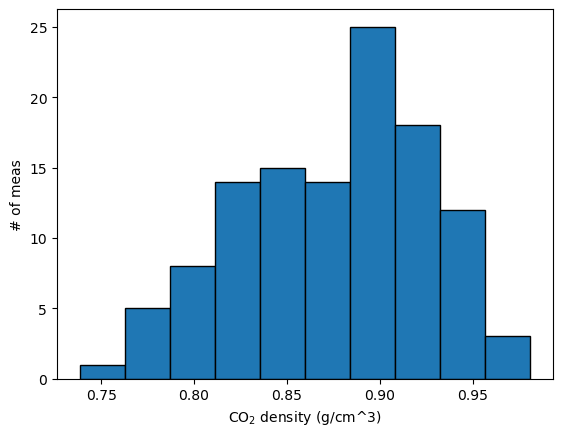

In [3]:
plt.hist(data['Density (g/cm^3)'], ec='k')
plt.xlabel('CO$_2$ density (g/cm^3)')
plt.ylabel('# of meas')

## Now lets propagate uncertainty in each fluid inclusion
- Here we use a temperature of 1150 K, with a +-50 K (i.e. an absolute uncertainty) distributed normally
- We say the error in CO2 density (from repeated Raman measurements) is 0.002925 g/cm3 (i.e. an absolute uncertainty) distributed normally 
- We want to use 2 step crustal density model, with 2800 kg/m3 above 14km depth, and 3100kg/m3 below

In [4]:
data['Density (g/cm^3)']

0      0.875343
1      0.780430
2      0.936785
3      0.928828
4      0.928514
         ...   
110    0.905506
111    0.877847
112    0.897180
113    0.894961
114    0.897539
Name: Density (g/cm^3), Length: 115, dtype: float64

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.009001,6.007338,0.230738,21.114141,21.108671,0.758733,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.709025,4.708164,0.181750,16.839448,16.836618,0.597647,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.017504,7.014342,0.258547,24.430384,24.419986,0.850177,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.875605,6.877243,0.247706,23.963779,23.969167,0.814529,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.874233,6.874695,0.251335,23.959267,23.960786,0.826460,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


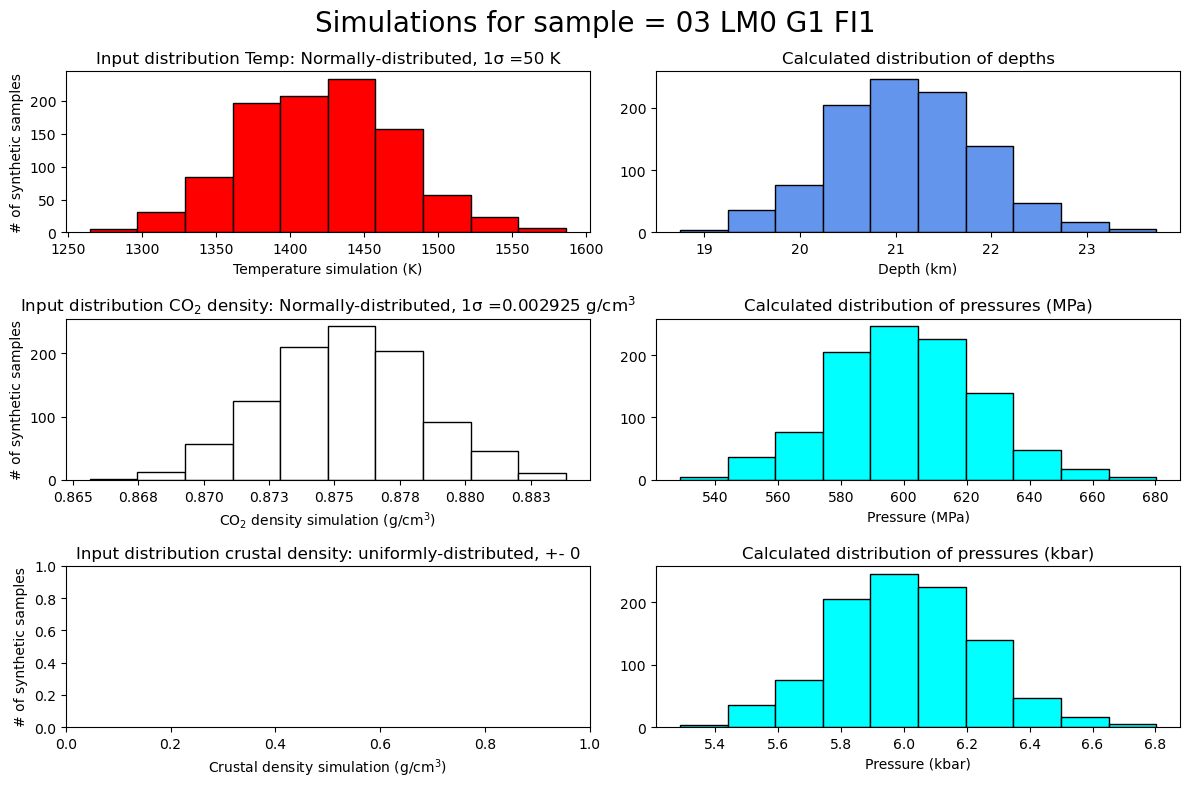

In [18]:
MC_Av, MC_All, fig=pf.propagate_FI_uncertainty(
T_K=1150+273.15,
error_T_K=50, 
error_type_T_K='Abs', 
error_dist_T_K='normal',
CO2_dens_gcm3=data['Density (g/cm^3)'],
error_CO2_dens=0.002925, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=data['FileName'],
model='two-step', d1=14, rho1=2800, rho2=3100,
N_dup=1000, fig_i=0, plot_figure=True)
MC_Av.head()

In [19]:
MC_Av.head()

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,std_dev_MC_D_km,error_T_K,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS
0,03 LM0 G1 FI1,0.875343,21.140399,6.016987,6.009001,6.007338,0.230738,21.114141,21.108671,0.758733,50,0.002925,0.0,1423.15,0.875343,two-step,None,SW96
1,06 LM0 G2 FI1,0.780430,16.834446,4.707503,4.709025,4.708164,0.181750,16.839448,16.836618,0.597647,50,0.002925,0.0,1423.15,0.780430,two-step,None,SW96
2,17 LM0 G3 FI3,0.936785,24.412263,7.011993,7.017504,7.014342,0.258547,24.430384,24.419986,0.850177,50,0.002925,0.0,1423.15,0.936785,two-step,None,SW96
3,11 LM0 G3 FI1 (CRR),0.928828,23.965558,6.876146,6.875605,6.877243,0.247706,23.963779,23.969167,0.814529,50,0.002925,0.0,1423.15,0.928828,two-step,None,SW96
4,19 LM0 G3 FI4,0.928514,23.948123,6.870844,6.874233,6.874695,0.251335,23.959267,23.960786,0.826460,50,0.002925,0.0,1423.15,0.928514,two-step,None,SW96


In [20]:
MC_All.head()

,Filename,Pressure (kbar),Pressure (MPa),Depth (km),input_crust_dens_kgm3,model,MC_T_K,MC_CO2_dens_gcm3
0,03 LM0 G1 FI1,5.893814,589.381414,20.735373,None,two-step,1394.719351,0.875427
1,03 LM0 G1 FI1,5.895797,589.579690,20.741892,None,two-step,1406.979941,0.871980
2,03 LM0 G1 FI1,6.166203,616.620327,21.631065,None,two-step,1476.459173,0.870064
3,03 LM0 G1 FI1,6.158392,615.839151,21.605378,None,two-step,1447.022358,0.877766
4,03 LM0 G1 FI1,5.694285,569.428453,20.079263,None,two-step,1366.604451,0.870252


### Lets get a logical for each sample

In [21]:
sam0=data['SAMPLE']==0
sam1=data['SAMPLE']==2
sam4=data['SAMPLE']==4
sam6=data['SAMPLE']==6

## Lets plot each FI depth and its error bar, colored by sample (as in Dayton et al. 2023)

Text(0, 0.5, 'Pressure (kbar)')

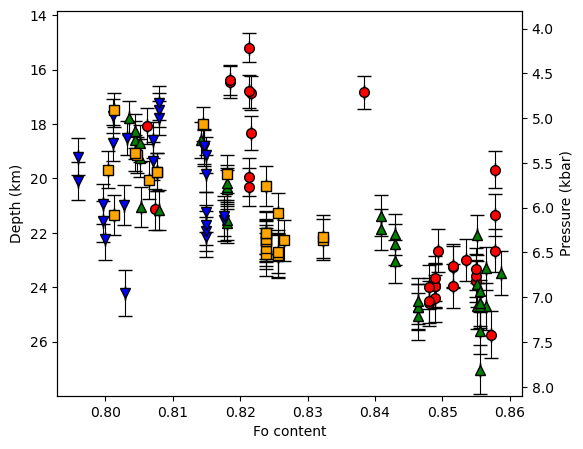

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax1.invert_yaxis()
ax2=ax1.twinx()
ax2.invert_yaxis()
# This sets the range of pressures you want
Plim1=3.8
Plim2=8.1
ax2.set_ylim([Plim2, Plim1])
# This calculates the corresponding depths for those pressures. 
D_Plim1=pf.convert_pressure_depth_2step(P_kbar=Plim1, d1=14, rho1=2800, rho2=3100, g=9.81)
D_Plim2=pf.convert_pressure_depth_2step(P_kbar=Plim2, d1=14, rho1=2800, rho2=3100, g=9.81)
ax1.set_ylim([D_Plim2, D_Plim1])
ax2.set_ylabel('Pressure (kbar)')

In [23]:
# Save results to excel
MC_Av.to_clipboard(excel=True)

## Complex double axis aligning
- The plot above was relatively easy, because we were always working below the density transition from layer 1 to layer 2
- What if we want to duplicate the axis spanning our multi-step profile?

## Lets use a linspace of pressure first

In [24]:
P_lin=np.linspace(0, 10, 11)
P_lin

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [25]:
D_lin=pf.convert_pressure_to_depth(P_kbar=P_lin, model='two-step', d1=14, rho1=2800, rho2=3100, g=9.81)

In [26]:
np.array(D_lin)

array([ 0.        ,  3.64059997,  7.28119994, 10.92179991, 14.50797409,
       17.79625793, 21.08454178, 24.37282562, 27.66110947, 30.94939331,
       34.23767716])

## Lets calculate depths for that linspace

Text(0, 0.5, 'ax2 Pressure (kbar)')

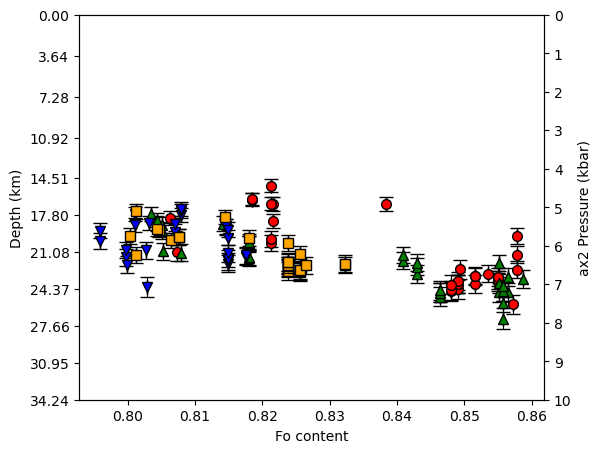

In [27]:
import matplotlib.ticker as ticker
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax2=ax1.twinx()



# First, get the limits right
ax1.set_ylim([np.max(D_lin), np.min(D_lin)])
ax2.set_ylim([np.max(P_lin), np.min(P_lin)])

# Now set the ticks - For Pressure, its easy, its the ticks we expected
ax2.set_yticks(P_lin)
# For depth, its more complex, as they wont be integers. 
ax1.set_yticks(D_lin)

ax2.set_ylabel('ax2 Pressure (kbar)')

C:\Users\penny\AppData\Local\Temp\ipykernel_23088\1448104194.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(rounded_ticks)


Text(0, 0.5, 'ax2 Pressure (kbar)')

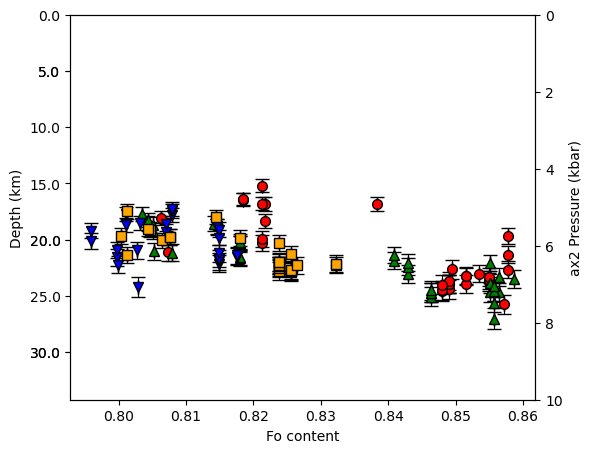

In [28]:
import matplotlib.ticker as ticker
fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))


ms=7
ax1.errorbar(data['Fo'].loc[sam0], 
             MC_Av['SingleFI_D_km'].loc[sam0],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam0],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam1], 
             MC_Av['SingleFI_D_km'].loc[sam1],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam1],
             fmt='^', ecolor='k', elinewidth=0.8, mfc='green', ms=ms, mec='k', capsize=5)

ax1.errorbar(data['Fo'].loc[sam4], 
             MC_Av['SingleFI_D_km'].loc[sam4],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam4],
             fmt='v', ecolor='k', elinewidth=0.8, mfc='blue', ms=ms, mec='k', capsize=5)
ax1.errorbar(data['Fo'].loc[sam6], 
             MC_Av['SingleFI_D_km'].loc[sam6],
             xerr=0, yerr=MC_Av['std_dev_MC_D_km'].loc[sam6],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='orange', ms=ms, mec='k', capsize=5)
ax1.set_xlabel('Fo content')
ax1.set_ylabel('Depth (km)')
ax2=ax1.twinx()



# First, get the limits right

ax2.set_ylim([np.max(P_lin), np.min(P_lin)])

# Now set the ticks - For Pressure, its easy, its the ticks we expected
#ax2.set_yticks(P_lin)
# For depth, its more complex, as they wont be integers. 
rounded_ticks = np.round(D_lin / 5) * 5

ax1.set_yticklabels(rounded_ticks)
ax1.set_yticks(rounded_ticks)
ax1.set_ylim([np.max(D_lin), np.min(D_lin)])


ax2.set_ylabel('ax2 Pressure (kbar)')